In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from librosa import magphase
import os

In [ ]:
# Set paths
root_dir = '/content/drive/MyDrive/Animal_Dataset'  # Path to main data folder

# Define animal categories
animals = ['Dog']

# Iterate through each animal category
for animal in animals:
    animal_folder = os.path.join(root_dir, animal)
    file_count = len(os.listdir(animal_folder))
    print(f"{animal.capitalize()} has {file_count} files.")


Dog has 637 files.


Dog1 has 77 files.


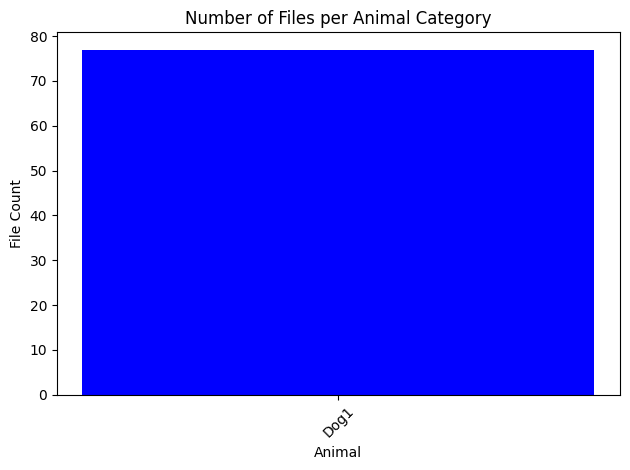

In [ ]:
import os
import matplotlib.pyplot as plt

# Set paths
root_dir = '/content/drive/MyDrive/Animal'  # Path to main data folder

# Define animal categories
animals = ['Dog1']

# List to store file counts
file_counts = []

# Iterate through each animal category
for animal in animals:
    animal_folder = os.path.join(root_dir, animal)
    file_count = len(os.listdir(animal_folder))
    file_counts.append(file_count)
    print(f"{animal.capitalize()} has {file_count} files.")

# Create a bar graph to visualize file counts
plt.bar(animals, file_counts, color='blue')
plt.xlabel('Animal')
plt.ylabel('File Count')
plt.title('Number of Files per Animal Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the graph
plt.show()


In [ ]:
from IPython.display import Audio

# Replace with the correct file path
file_path = "/content/drive/MyDrive/Animal/Dog/d13.wav"

# Play the audio
Audio(file_path)


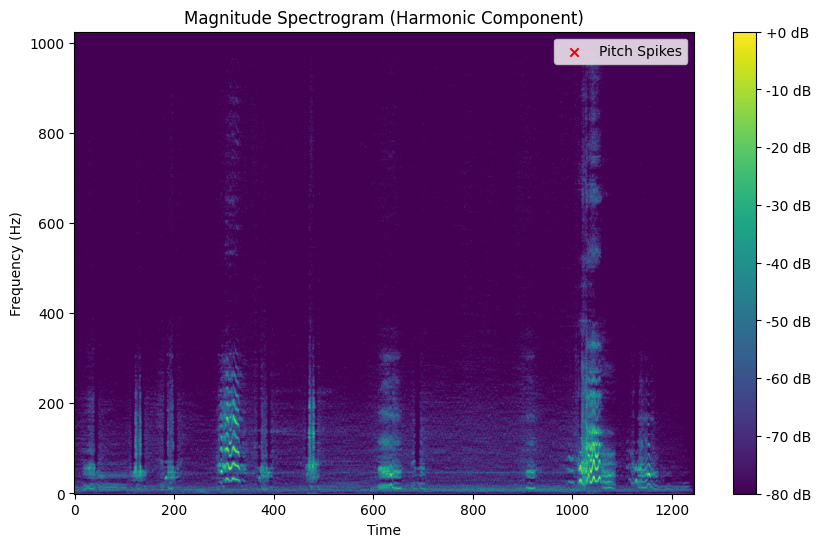

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Replace "audio_example.wav" with the correct file path
PATH = "/content/drive/MyDrive/Animal/Dog/d13.wav"

# Load the audio file using librosa
original_audio, sample_rate = librosa.load(PATH)

# Harmonic-Percussive Source Separation
harmonic, percussive = librosa.effects.hpss(original_audio)

# Compute the magnitude spectrogram of the harmonic component
harmonic_mag = np.abs(librosa.stft(harmonic))

# Find peaks in the harmonic magnitude spectrogram
peaks, _ = find_peaks(harmonic_mag.max(axis=0), height=100)  # You can adjust the height threshold as needed

# Convert peak indices to frequencies
frequencies = librosa.fft_frequencies(sr=sample_rate, n_fft=2048)  # n_fft is the window size used in STFT

# Get the corresponding frequencies for the detected peaks
peak_frequencies = frequencies[peaks]

# Plot the magnitude spectrogram
plt.figure(figsize=(10, 6))
plt.imshow(librosa.amplitude_to_db(harmonic_mag, ref=np.max), origin='lower', aspect='auto', cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.title('Magnitude Spectrogram (Harmonic Component)')
plt.colorbar(format='%+2.0f dB')

# Plot the peaks on the graph
plt.scatter(peaks, peak_frequencies, color='red', marker='x', label='Pitch Spikes')

plt.legend()
plt.show()

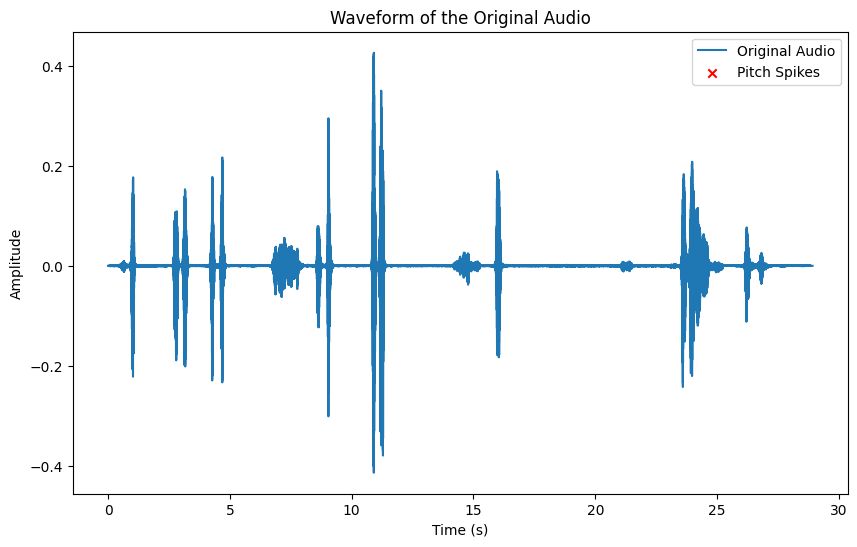

In [ ]:
# Replace "audio_example.wav" with the correct file path
PATH = "/content/drive/MyDrive/Animal/Dog/d13.wav"

# Load the audio file using librosa
original_audio, sample_rate = librosa.load(PATH)

# Harmonic-Percussive Source Separation
harmonic, percussive = librosa.effects.hpss(original_audio)

# Compute the magnitude spectrogram of the harmonic component
harmonic_mag = np.abs(librosa.stft(harmonic))

# Find peaks in the harmonic magnitude spectrogram
peaks, _ = find_peaks(harmonic_mag.max(axis=0), height=100)  # You can adjust the height threshold as needed

# Convert peak indices to time values
times = librosa.times_like(harmonic_mag, sr=sample_rate)  # Time values corresponding to each column in the spectrogram

# Get the corresponding time values for the detected peaks
peak_times = times[peaks]

# Plot the original audio waveform
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(original_audio)) / sample_rate, original_audio, label='Original Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of the Original Audio')

# Plot the pitch spikes on the waveform
plt.scatter(peak_times, original_audio[peaks], color='red', marker='x', label='Pitch Spikes')

plt.legend()
plt.show()

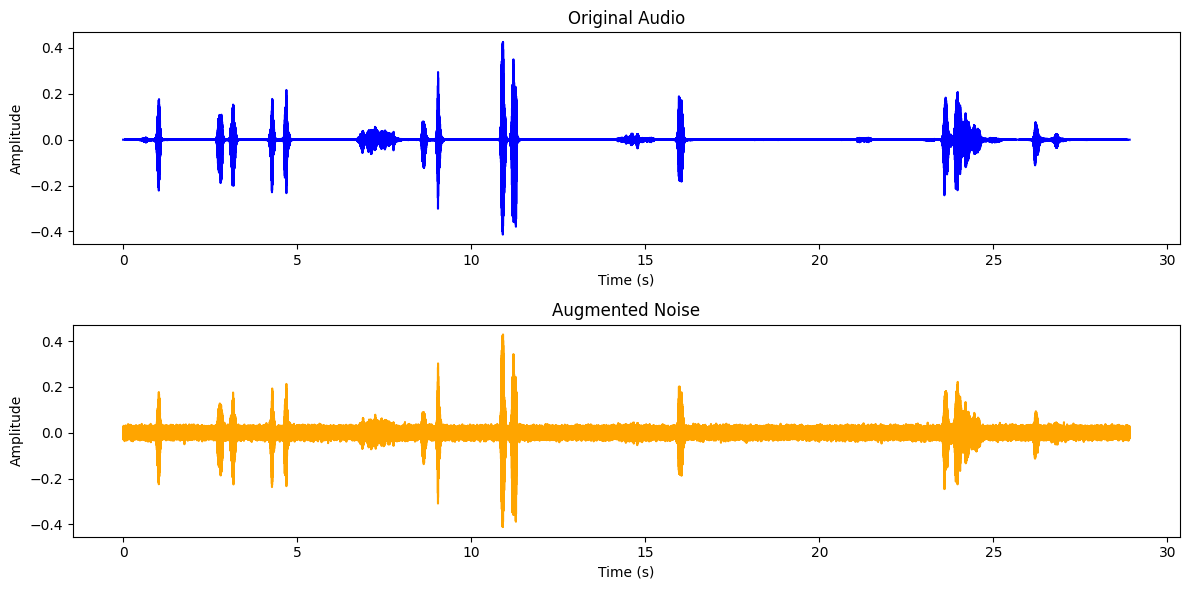

In [ ]:
import soundfile as sf
import random
import matplotlib.pyplot as plt

# Replace "audio_example.wav" with the correct file path
PATH = "/content/drive/MyDrive/Animal/Dog/d13.wav"

# Load the original audio file using librosa
original_audio, sample_rate = librosa.load(PATH)

# Function to apply data augmentation
def augment_audio(audio_data, sample_rate):
    # Your data augmentation code here
    # For example, let's add some random Gaussian noise to the audio
    augmented_audio = audio_data + 0.01 * np.random.randn(len(audio_data))
    return augmented_audio

# Augment the original audio
augmented_audio = augment_audio(original_audio, sample_rate)

# Create a time axis for plotting
time_axis = np.linspace(0, len(original_audio) / sample_rate, len(original_audio))

# Plot the original audio waveform in blue
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_axis, original_audio, color='blue')
plt.title('Original Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the augmented audio waveform in orange
plt.subplot(2, 1, 2)
plt.plot(time_axis, augmented_audio, color='orange')
plt.title('Augmented Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


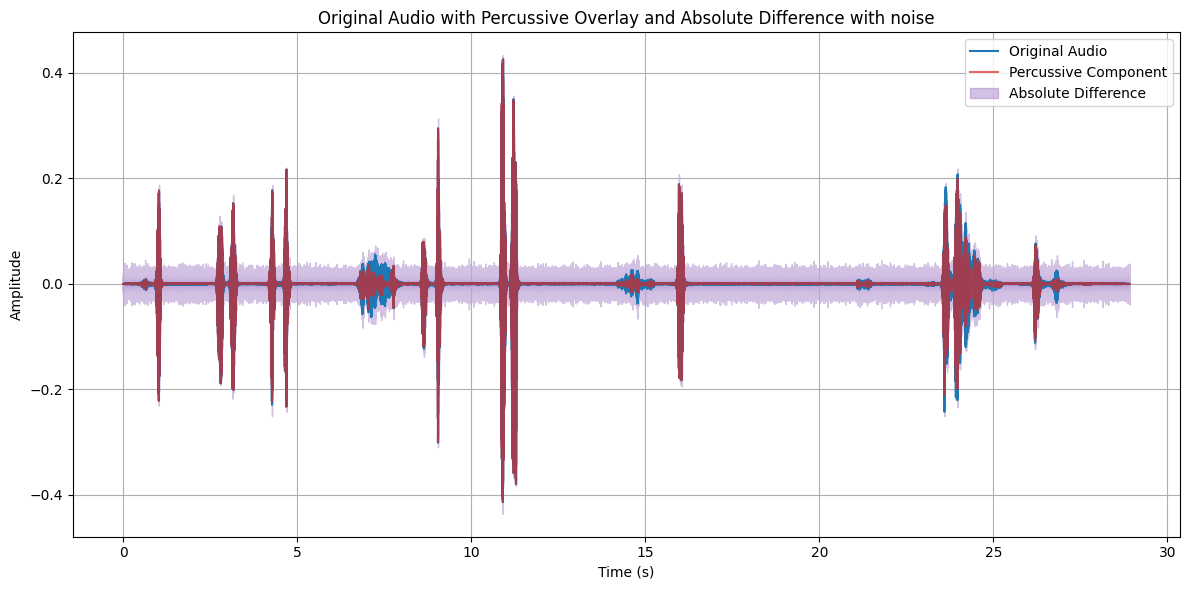

In [ ]:
# Replace with the correct file path
PATH = "/content/drive/MyDrive/Animal/Dog/d13.wav"
# Load the original audio file using librosa
original_audio, sample_rate = librosa.load(PATH)

# Function to apply data augmentation
def augment_audio(audio_data, scale=0.01):
    augmented_audio = audio_data + scale * np.random.randn(len(audio_data))
    return augmented_audio

# Augment the original audio
augmented_audio = augment_audio(original_audio)

# Calculate the absolute difference between the two waveforms
difference = np.abs(augmented_audio - original_audio)

# Create a time axis for plotting
time_axis = np.linspace(0, len(original_audio) / sample_rate, len(original_audio))

# Reference code for displaying multiple waveforms
y_harm, y_perc = librosa.effects.hpss(original_audio)

# Set up color palette
original_color = '#1f77b4'  # Blue
percussive_color = '#d62728'  # Red
difference_color = '#9467bd'  # Purple

# Plot the original audio waveform and the difference
plt.figure(figsize=(12, 6))

# Plot the original audio waveform
plt.plot(time_axis, original_audio, color=original_color, label='Original Audio')

# Overlay the percussive component on the original waveform
plt.plot(time_axis, y_perc, color=percussive_color, label='Percussive Component', alpha=0.7)

# Plot the absolute difference as a shaded region
plt.fill_between(time_axis, original_audio - difference, original_audio + difference, color=difference_color, alpha=0.4, label='Absolute Difference')

plt.title('Original Audio with Percussive Overlay and Absolute Difference with noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# Replace with your input folder path
input_folder_path = "/content/drive/MyDrive/Animal/Dog1"

# Replace with your output folder path
output_folder_path = "/content/drive/MyDrive/Animal/Dog1"

# Function to apply data augmentation
def augment_audio(audio_data, sample_rate):
    augmented_audio = audio_data + 0.01 * np.random.randn(len(audio_data))
    return augmented_audio

# List all files in the input folder
all_files = os.listdir(input_folder_path)
audio_files = [file for file in all_files if file.endswith(".wav")]

# Ensure the output folder exists
os.makedirs(output_folder_path, exist_ok=True)

# Process each audio file in the folder
for audio_file in audio_files:
    file_path = os.path.join(input_folder_path, audio_file)
    audio_data, sample_rate = librosa.load(file_path)

    augmented_audio = augment_audio(audio_data, sample_rate)

    # Create the output file path in the output folder
    output_file = os.path.splitext(audio_file)[0] + "_augmentednoise.wav"
    output_path = os.path.join(output_folder_path, output_file)

    # Save the augmented audio
    sf.write(output_path, augmented_audio, sample_rate)
